In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import gzip
import random

In [2]:
def load_mnist(filename, type, n_datapoints):
    # MNIST Images have 28*28 pixels dimension
    image_size = 28
    f = gzip.open(filename)
    
    if(type == 'image'):
        f.read(16)    # Skip Non-Image information
        buf = f.read(n_datapoints * image_size * image_size)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(n_datapoints, image_size, image_size, 1)
    elif(type == 'label'):
        f.read(8) # Skip Unessential information
        buf = f.read(n_datapoints)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
        data = data.reshape(n_datapoints, 1)
    return data

In [3]:
# Training Dataset
train_size = 60000
test_size = 10000

X = load_mnist('Downloads/train-images-idx3-ubyte.gz', 'image', train_size)
y = load_mnist('Downloads/train-labels-idx1-ubyte.gz', 'label', train_size)
X_test = load_mnist('Downloads/t10k-images-idx3-ubyte.gz', 'image', test_size)
y_test = load_mnist('Downloads/t10k-labels-idx1-ubyte.gz', 'label', test_size)

Index:  39372
Training Set: 
Label: [6]


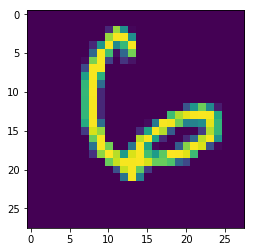

In [4]:
index = random.randint(0, train_size)
print('Index: ', index)
print('Training Set: ')
print('Label:', y[index])
img = np.asarray(X[index]).squeeze()
plt.imshow(img)
plt.show()

Index:  7577
Training Set: 
Label: [5]


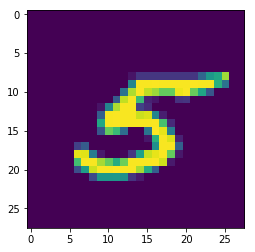

In [5]:
index = random.randint(0, test_size)
print('Index: ', index)
print('Training Set: ')
print('Label:', y_test[index])
img = np.asarray(X_test[index]).squeeze()
plt.imshow(img)
plt.show()

t1 = X_test[index].reshape(1, 28*28)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X[:(train_size//10)], y[:(train_size//10)], test_size=0.25, random_state=28)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(4500, 28, 28, 1) (1500, 28, 28, 1) (4500, 1) (1500, 1)


<h3>To determine the optimal value of K</h3>

In [7]:
score = []

for k in range(1, 9):
    print('Begin KNN with k=',k)
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier = classifier.fit(X_train.reshape(X_train.shape[0], 28*28), y_train)
    pred = classifier.predict(X_valid.reshape(X_valid.shape[0], 28*28))
    accuracy = accuracy_score(y_valid, pred)
    score.append(accuracy)
    print("Accuracy: ",accuracy)
    print("Confusion Matrix:\n", confusion_matrix(y_valid, pred))
    print("\n---------------\n")

Begin KNN with k= 1


C:\Users\Sonali\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy:  0.9506666666666667
Confusion Matrix:
 [[143   0   0   0   0   0   0   0   0   0]
 [  0 156   0   1   0   0   0   0   0   0]
 [  0   3 127   0   0   0   0   2   2   0]
 [  2   1   1 151   0   3   1   0   1   1]
 [  0   4   0   0 157   0   2   0   0   6]
 [  1   0   0   0   2 128   1   0   0   2]
 [  1   0   0   0   0   0 157   0   1   0]
 [  0   4   0   1   1   2   0 166   0   3]
 [  0   1   3   4   0   2   0   1 110   0]
 [  4   0   1   1   5   0   0   3   0 131]]

---------------

Begin KNN with k= 2


C:\Users\Sonali\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy:  0.9266666666666666
Confusion Matrix:
 [[143   0   0   0   0   0   0   0   0   0]
 [  0 156   0   1   0   0   0   0   0   0]
 [  0   6 126   0   0   0   1   1   0   0]
 [  2   2   2 150   0   2   1   1   1   0]
 [  0   8   0   0 156   0   2   0   0   3]
 [  4   1   0   1   2 125   1   0   0   0]
 [  1   0   0   0   1   2 155   0   0   0]
 [  1   6   1   1   7   1   0 159   0   1]
 [  0   3   6   5   0   7   0   0 100   0]
 [  5   2   0   2  10   1   0   5   0 120]]

---------------

Begin KNN with k= 3


C:\Users\Sonali\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy:  0.938
Confusion Matrix:
 [[143   0   0   0   0   0   0   0   0   0]
 [  0 156   0   1   0   0   0   0   0   0]
 [  0   5 126   1   0   0   0   1   1   0]
 [  2   2   0 152   0   3   0   0   0   2]
 [  0   7   0   0 155   0   1   0   0   6]
 [  4   2   0   2   2 119   1   0   2   2]
 [  2   0   0   0   1   1 155   0   0   0]
 [  1   4   0   0   5   0   0 163   0   4]
 [  0   3   4   7   0   1   0   0 106   0]
 [  4   1   0   2   1   0   1   4   0 132]]

---------------

Begin KNN with k= 4


C:\Users\Sonali\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy:  0.9386666666666666
Confusion Matrix:
 [[143   0   0   0   0   0   0   0   0   0]
 [  0 156   0   1   0   0   0   0   0   0]
 [  0   5 126   1   0   0   1   1   0   0]
 [  2   2   0 154   0   1   0   0   0   2]
 [  0   6   0   0 158   0   1   0   0   4]
 [  3   1   0   5   1 117   1   1   2   3]
 [  2   0   0   0   0   1 156   0   0   0]
 [  1   4   0   0   3   1   0 165   0   3]
 [  0   3   4   5   0   3   0   0 106   0]
 [  4   1   0   2   4   0   1   6   0 127]]

---------------

Begin KNN with k= 5


C:\Users\Sonali\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy:  0.9393333333333334
Confusion Matrix:
 [[141   0   0   0   0   1   1   0   0   0]
 [  0 157   0   0   0   0   0   0   0   0]
 [  0   5 126   0   0   0   0   1   2   0]
 [  1   3   0 154   0   1   0   0   0   2]
 [  0   6   0   0 154   0   1   0   0   8]
 [  3   2   0   5   1 117   2   0   1   3]
 [  2   0   0   0   0   1 156   0   0   0]
 [  1   5   0   0   2   1   0 165   0   3]
 [  0   3   3   5   0   3   0   0 107   0]
 [  4   2   0   1   1   0   1   4   0 132]]

---------------

Begin KNN with k= 6


C:\Users\Sonali\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy:  0.94
Confusion Matrix:
 [[141   0   0   0   0   1   1   0   0   0]
 [  0 157   0   0   0   0   0   0   0   0]
 [  1   6 123   1   0   0   0   1   2   0]
 [  1   3   0 155   0   0   0   0   0   2]
 [  0   6   0   0 155   0   1   0   0   7]
 [  3   1   0   5   1 117   2   1   1   3]
 [  1   1   0   0   0   1 156   0   0   0]
 [  0   5   0   0   2   1   0 167   0   2]
 [  0   3   3   6   0   1   0   0 108   0]
 [  4   1   0   2   1   0   1   5   0 131]]

---------------

Begin KNN with k= 7


C:\Users\Sonali\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy:  0.9366666666666666
Confusion Matrix:
 [[140   0   0   0   0   1   2   0   0   0]
 [  0 156   0   0   0   0   0   0   0   1]
 [  1   5 124   0   0   0   0   2   2   0]
 [  2   4   0 153   0   0   0   0   0   2]
 [  0   6   0   0 150   0   2   0   0  11]
 [  3   2   0   4   1 118   2   0   1   3]
 [  2   1   0   0   0   1 155   0   0   0]
 [  0   5   0   0   2   1   0 165   0   4]
 [  0   3   1   5   0   2   0   0 110   0]
 [  4   1   0   2   0   0   1   3   0 134]]

---------------

Begin KNN with k= 8


C:\Users\Sonali\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy:  0.936
Confusion Matrix:
 [[141   0   0   0   0   1   1   0   0   0]
 [  0 156   0   0   0   0   0   0   0   1]
 [  1   5 125   0   0   0   0   1   2   0]
 [  1   4   0 154   0   0   0   0   0   2]
 [  0   6   0   0 154   0   2   0   0   7]
 [  3   2   0   5   1 118   2   0   0   3]
 [  2   1   0   0   0   1 155   0   0   0]
 [  0   6   0   0   1   1   0 165   0   4]
 [  0   3   2   7   0   3   0   0 106   0]
 [  3   1   0   2   2   1   1   5   0 130]]

---------------



Plot the graph with accuracy for all 8 values of K in order to visualize and select the appropriate K value

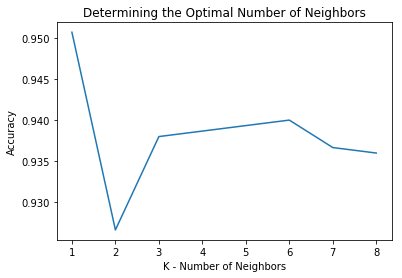

In [8]:
plt.plot(range(1,9), score)
plt.title('Determining the Optimal Number of Neighbors')
plt.xlabel('K - Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

As we can see that the highest accuracy is achieved at K=1, but it is neglected as probability is based on a single sample and thus, might be sensitive to mislabelling of data, nose distortion, etc.
Therefore, we can see, <b>the most optimal value is K=6</b>

In [9]:
%%time
print('Training the Model')
classifier = KNeighborsClassifier(n_neighbors=6)
classifier = classifier.fit(X.reshape(X.shape[0], 28*28), y)

Training the Model


C:\Users\Sonali\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Wall time: 34.1 s


In [10]:
%%time
y_pred = classifier.predict(X_test.reshape(X_test.shape[0], 28*28))

Wall time: 17min 47s


In [11]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 975    1    1    0    0    1    1    1    0    0]
 [   0 1132    2    0    0    0    1    0    0    0]
 [  12   11  985    2    1    0    2   15    4    0]
 [   0    3    3  978    1   10    1    8    3    3]
 [   2    7    0    0  953    0    4    1    1   14]
 [   6    0    0   14    2  862    3    1    1    3]
 [   6    4    0    0    3    2  943    0    0    0]
 [   0   26    4    0    2    0    0  987    0    9]
 [   7    4    5   16    8   12    5    6  906    5]
 [   6    7    3    7   12    3    1   12    2  956]]
0.9677


In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1014
           1       1.00      0.95      0.97      1195
           2       0.95      0.98      0.97      1003
           3       0.97      0.96      0.96      1017
           4       0.97      0.97      0.97       982
           5       0.97      0.97      0.97       890
           6       0.98      0.98      0.98       961
           7       0.96      0.96      0.96      1031
           8       0.93      0.99      0.96       917
           9       0.95      0.97      0.96       990

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



Thus, we have achieved an accuracy of <b>96.77%</b> with <b>K=5</b>.

In [13]:
import joblib

joblib.dump(classifier, 'knn_model.gzip', compress=('gzip',3))

['knn_model.gzip']